___
# Ciência dos Dados - PROJETO 1

## Felippe Teracini

## Analise de acesso a internet no Brasil

___
## Introdução

O objetivo desse projeto é analisar o acesso a internet nas diferentes regiões do Brasil, observando fatores como renda e zona.

## Perguntas

1-Qual região do Brasil teve maior aumento percentual de acesso ao longo dos 3 anos para uma faixa de renda de ate 10 salarios minimos?

2-Em qual região o acesso para rendas de ate 2 salarios minimos teve maior aumento percentual ao longo dos 3 anos?

3-Qual regiao teve maior aumento percentual de acesso em cada zona?

___
## Análise e Resultados

In [198]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [199]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Felippe\Documents\Insper\Semestre 2\Ciencia dos Dados\Projeto 1\Projeto-1-CD


In [200]:
#Se usar o arquivo descompactado
#pd.read_csv('DOM2015.csv',sep=',')

#Se usar o arquivo compactado como está no dropbox púbico
dados2015 = pd.read_csv('DOM2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')
dados2014 = pd.read_csv('DOM2014csv.zip', compression='zip', header=0, sep=',', quotechar='"')
dados2013 = pd.read_csv('DOM2013csv.zip', compression='zip', header=0, sep=',', quotechar='"')

Separando as variaveis

In [201]:
# Região
# 2015
dados2015.loc[(dados2015.UF <= 17), "Região"] = "Norte"
dados2015.loc[(dados2015.UF > 29) & (dados2015.UF <= 35),"Região"] = "Sudeste"


# 2014
dados2014.loc[(dados2014.UF <= 17), "Região"] = "Norte"
dados2014.loc[(dados2014.UF > 29) & (dados2014.UF <= 35),"Região"] = "Sudeste"


# 2013
dados2013.loc[(dados2013.UF <= 17), "Região"] = "Norte"
dados2013.loc[(dados2013.UF > 29) & (dados2013.UF <= 35),"Região"] = "Sudeste"




# Zona
# 2015
dados2015.loc[(dados2015.V4105 == 1), "Zona"] = "Urbana"
dados2015.loc[(dados2015.V4105 == 2), "Zona"] = "Urbana"
dados2015.loc[(dados2015.V4105 == 3), "Zona"] = "Urbana"
dados2015.loc[(dados2015.V4105 == 4), "Zona"] = "Rural"
dados2015.loc[(dados2015.V4105 == 5), "Zona"] = "Rural"
dados2015.loc[(dados2015.V4105 == 6), "Zona"] = "Rural"
dados2015.loc[(dados2015.V4105 == 7), "Zona"] = "Rural"
dados2015.loc[(dados2015.V4105 == 8), "Zona"] = "Rural"
# 2014
dados2014.loc[(dados2014.V4105 == 1), "Zona"] = "Urbana"
dados2014.loc[(dados2014.V4105 == 2), "Zona"] = "Urbana"
dados2014.loc[(dados2014.V4105 == 3), "Zona"] = "Urbana"
dados2014.loc[(dados2014.V4105 == 4), "Zona"] = "Rural"
dados2014.loc[(dados2014.V4105 == 5), "Zona"] = "Rural"
dados2014.loc[(dados2014.V4105 == 6), "Zona"] = "Rural"
dados2014.loc[(dados2014.V4105 == 7), "Zona"] = "Rural"
dados2014.loc[(dados2014.V4105 == 8), "Zona"] = "Rural"
# 2013
dados2013.loc[(dados2013.V4105 == 1), "Zona"] = "Urbana"
dados2013.loc[(dados2013.V4105 == 2), "Zona"] = "Urbana"
dados2013.loc[(dados2013.V4105 == 3), "Zona"] = "Urbana"
dados2013.loc[(dados2013.V4105 == 4), "Zona"] = "Rural"
dados2013.loc[(dados2013.V4105 == 5), "Zona"] = "Rural"
dados2013.loc[(dados2013.V4105 == 6), "Zona"] = "Rural"
dados2013.loc[(dados2013.V4105 == 7), "Zona"] = "Rural"
dados2013.loc[(dados2013.V4105 == 8), "Zona"] = "Rural"

# Acesso a Internet
# 2015
dados2015.loc[(dados2015.V02322 == 2), "Internet"] = "Sim"
dados2015.loc[(dados2015.V02322 == 4), "Internet"] = "Não"
# 2014
dados2014.loc[(dados2014.V02322 == 2), "Internet"] = "Sim"
dados2014.loc[(dados2014.V02322 == 4), "Internet"] = "Não"
# 2013
dados2013.loc[(dados2013.V02322 == 2), "Internet"] = "Sim"
dados2013.loc[(dados2013.V02322 == 4), "Internet"] = "Não"

# Renda
# 2015
dados2015 = dados2015.rename(columns={"V4614": "Renda"})
# 2014
dados2014 = dados2014.rename(columns={"V4614": "Renda"})
# 2013
dados2013 = dados2013.rename(columns={"V4614": "Renda"})

# Definição final
# 2015
dados2015 = dados2015.loc[:,["Região", "Zona", "Internet", "Renda"]]
dados2015 = dados2015[dados2015.Renda <= 7880]
dados2015 = dados2015.dropna()
# 2014
dados2014 = dados2014.loc[:,["Região", "Zona", "Internet", "Renda"]]
dados2014 = dados2014[dados2014.Renda <= 7240]
dados2014 = dados2014.dropna()
# 2013
dados2013 = dados2013.loc[:,["Região", "Zona", "Internet", "Renda"]]
dados2013 = dados2013[dados2013.Renda <= 6780]
dados2013 = dados2013.dropna()

In [202]:
# Analise 5 2015
# Norte
Analise_5_2015_Norte = pd.crosstab(dados2015.Zona[dados2015.Região == "Norte"], dados2015.Internet[dados2015.Região == "Norte"], normalize=True)*100
Analise_5_2015_Norte

Internet,Não,Sim
Zona,,
Rural,18.787610,2.597074
Urbana,35.617913,42.997403


In [203]:
# Sudeste
Analise_5_2015_Sudeste = pd.crosstab(dados2015.Zona[dados2015.Região == "Sudeste"], dados2015.Internet[dados2015.Região == "Sudeste"], normalize=True)*100
Analise_5_2015_Sudeste

Internet,Não,Sim
Zona,,
Rural,5.304396,2.076985
Urbana,32.494870,60.123749


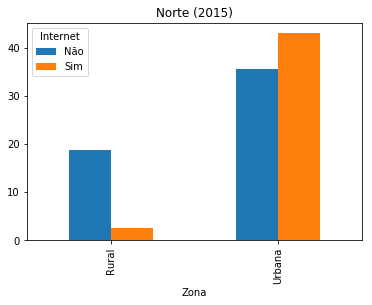

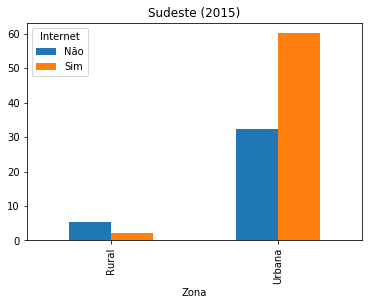

In [204]:
# Grafico Analise 5/1/3 2015
Analise_5_2015_Norte.plot(kind="bar", title="Norte (2015)")
Analise_5_2015_Sudeste.plot(kind="bar", title="Sudeste (2015)")

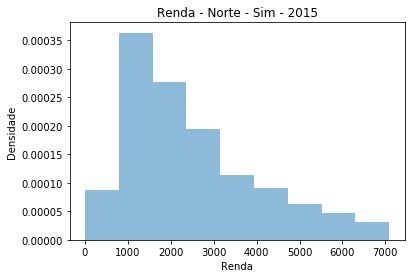

In [205]:
# Histogramas 2015 Norte
faixa = range(0,7880,788)
RENDA_cat = pd.cut(dados2015.Renda, bins=faixa)
RENDA_cat.value_counts(sort=False, normalize=True)*100

from numpy import zeros_like

plot = dados2015.Renda[(dados2015.Internet == "Sim") & (dados2015.Região == "Norte")].plot.hist(bins=faixa, title='Renda - Norte - Sim - 2015', normed=1, alpha=0.5)
plt.ylabel('Densidade')
plt.xlabel('Renda')

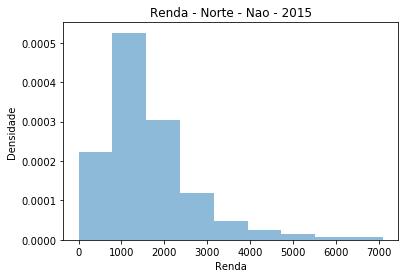

In [206]:
plot = dados2015.Renda[(dados2015.Internet == "Não") & (dados2015.Região == "Norte")].plot.hist(bins=faixa, title='Renda - Norte - Nao - 2015', normed=1, alpha=0.5)
plt.ylabel('Densidade')
plt.xlabel('Renda')

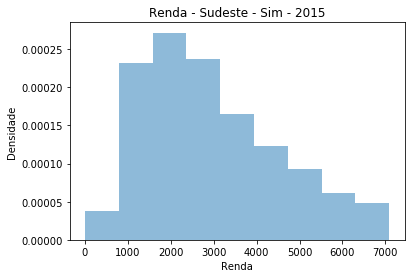

In [207]:
# Histogramas 2015 Sudeste
faixa = range(0,7880,788)
RENDA_cat = pd.cut(dados2015.Renda, bins=faixa)
RENDA_cat.value_counts(sort=False, normalize=True)*100

from numpy import zeros_like

plot = dados2015.Renda[(dados2015.Internet == "Sim") & (dados2015.Região == "Sudeste")].plot.hist(bins=faixa, title='Renda - Sudeste - Sim - 2015', normed=1, alpha=0.5)
plt.ylabel('Densidade')
plt.xlabel('Renda')

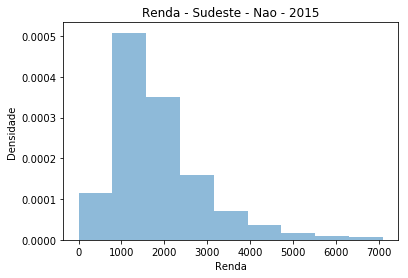

In [208]:
plot = dados2015.Renda[(dados2015.Internet == "Não") & (dados2015.Região == "Sudeste")].plot.hist(bins=faixa, title='Renda - Sudeste - Nao - 2015', normed=1, alpha=0.5)
plt.ylabel('Densidade')
plt.xlabel('Renda')

In [209]:
#dados2015

In [210]:
#dados2014

In [211]:
#dados2013

___
## Conclusão 

Descreva aqui suas conclusões!